In [52]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as kernels
import forAustin as fa
%matplotlib inline

In [2]:
fits = pf.open('/media/data/austinfortino/austinFull.fits')
fits.info()
nExposure = 432
exposure = fa.getExposure(fits, nExposure, polyOrder=3)

Filename: /media/data/austinfortino/austinFull.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  Exposures     1 BinTableHDU     47   2820R x 19C   [1D, 1D, 4A, 1D, 8A, 1D, 1J, 1J, 1D, 1D, 8A, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  2  RESIDUALS     1 BinTableHDU     25   73818788R x 8C   [I, J, D, D, D, D, D, L]   


In [27]:
ind = np.where(exposure['hasGaia'])[0]
u = np.take(exposure['u'], ind)
v = np.take(exposure['v'], ind)
dx = np.take(exposure['dx'], ind)
dy = np.take(exposure['dy'], ind)
E = np.take(exposure['measErr'], ind)

X = np.vstack((u, v)).T
Y = np.vstack((dx, dy)).T


Xtrain, Xtest, Ytrain, Ytest, Etrain, Etest= train_test_split(X, Y, E, test_size=0.20, random_state=1)

In [4]:
kernel = kernels.RBF(1) + kernels.WhiteKernel(1)

In [5]:
GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
GP.fit(Xtrain, Ytrain)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [7]:
Ypred, cov = GP.predict(Xtest, return_cov=True)

In [8]:
variance = np.diag(cov)
sigma = np.sqrt(variance)

In [9]:
Ypred.shape

(3111, 2)

In [10]:
Xtest.shape

(3111, 2)

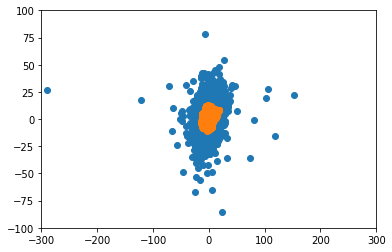

In [18]:
plt.xlim((-300, 300))
plt.ylim((-100, 100))
plt.scatter(Ytest[:, 0], Ytest[:, 1])
plt.scatter(Ypred[:, 0], Ypred[:, 1])
plt.show()

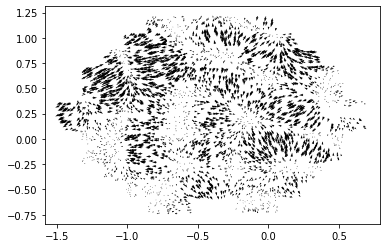

In [19]:
plt.quiver(Xtest[:, 0], Xtest[:, 1], Ypred[:, 0], Ypred[:, 1])

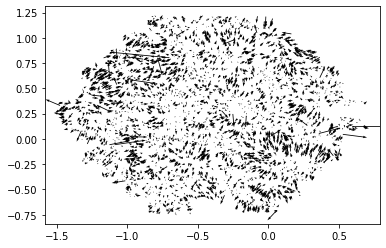

In [20]:
plt.quiver(Xtest[:, 0], Xtest[:, 1], Ytest[:, 0], Ytest[:, 1])

In [50]:
tab = {
    'u': Xtest[:, 0],
    'v': Xtest[:, 1],
    'dx': Ytest[:, 0],
    'dy': Ytest[:, 1],
    'measErr': Etest}